In [1]:
import datetime
import xarray as xr
import pickle
import pandas as pd
import numpy as np

tracks_c = np.zeros(shape=(1015, 1359), dtype=float)
tracks_p = np.zeros(shape=(1015, 1359), dtype=float)

for year in range(2000, 2013):

    if year != 2004:
        tracks_c += pickle.load(open("../tracks/climo/CTRL_{}-{}_trackcount.pkl".format(year, year+1), "rb"))
        tracks_p += pickle.load(open("../tracks/climo/PGW_{}-{}_trackcount.pkl".format(year, year+1), "rb"))
    
snow = xr.open_dataset("D:/snow_data/3H/3H_sum_SNOW_ACC_{}_{}-{}.nc".format("CTRL", 2000, 2001))

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from map_help import *

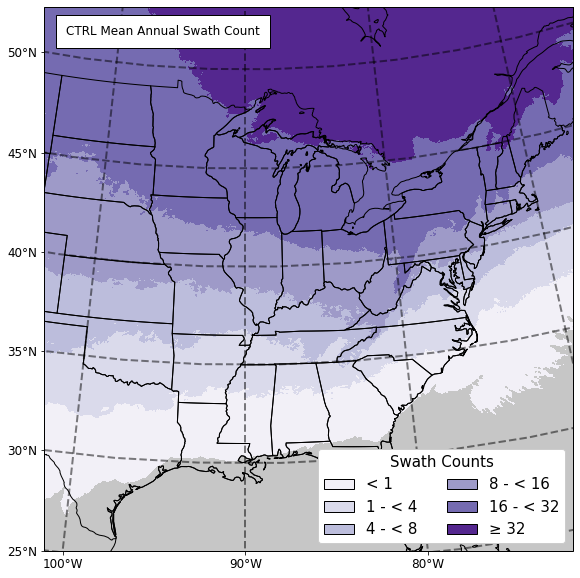

In [7]:
plt.rcParams['figure.figsize'] = 10, 10
import cartopy.crs as ccrs
from matplotlib.colors import BoundaryNorm, ListedColormap
from cartopy.mpl.geoaxes import GeoAxes

projection = ccrs.LambertConformal(central_longitude=-90)
axes_class = (GeoAxes,
              dict(map_projection=projection))

fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1,1),
                axes_pad=1,
                label_mode='')

for i, ax in enumerate(axgr):
    ax.set_extent([-101, -72, 25, 52], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    draw_states(ax)
    fig.canvas.draw()
        
    xticks = list(range(-170, -20, 10))
    yticks = list(range(10, 80, 5))
    ax.gridlines(xlocs=xticks, ylocs=yticks, linewidth=2, color='k', alpha=0.5, linestyle='--')

    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    lambert_xticks(ax, xticks)
    lambert_yticks(ax, yticks)
        
    val = tracks_c.copy() / 12

    mask = np.ma.masked_where(val != 0, 1*(val==0))

    classes = [0,1,4,8,16,32,64]

    legend_colors = ['#f2f0f7','#dadaeb','#bcbddc','#9e9ac8','#756bb1','#54278f']
    legend_boundaries = ["< 1", "1 - < 4", "4 - < 8", "8 - < 16", 
                     '16 - < 32', "≥ 32"]
    legend_title = "Swath Counts"

    description = "CTRL Mean Annual Swath Count"
    
    cmap = ListedColormap(legend_colors)
    norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)
        
    ax = generate_spc_legend(ax, legend_title, legend_boundaries, legend_colors, size=15, fontsize=15)
    
    ax.pcolormesh(snow.XLONG.values, snow.XLAT.values, val,
                  cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
    
    ax.pcolormesh(snow.XLONG.values, snow.XLAT.values, mask, vmin=0, vmax=3, 
                  cmap='Greys', transform=ccrs.PlateCarree())

    txt = ax.text(-104.2, 51, description, transform=ccrs.PlateCarree(), fontsize=12, 
                  bbox=dict(facecolor='w', edgecolor='k', pad=10.0))

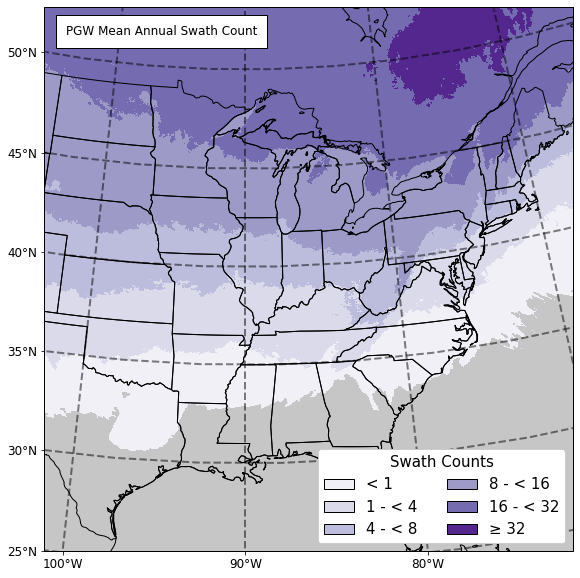

In [8]:
fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1,1),
                axes_pad=1,
                label_mode='')

for i, ax in enumerate(axgr):
    ax.set_extent([-101, -72, 25, 52], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    draw_states(ax)
    fig.canvas.draw()
        
    xticks = list(range(-170, -20, 10))
    yticks = list(range(10, 80, 5))
    ax.gridlines(xlocs=xticks, ylocs=yticks, linewidth=2, color='k', alpha=0.5, linestyle='--')

    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    lambert_xticks(ax, xticks)
    lambert_yticks(ax, yticks)
        
    val = tracks_p.copy() / 12

    mask = np.ma.masked_where(val != 0, 1*(val==0))

    classes = [0,1,4,8,16,32,64]

    legend_colors = ['#f2f0f7','#dadaeb','#bcbddc','#9e9ac8','#756bb1','#54278f']
    legend_boundaries = ["< 1", "1 - < 4", "4 - < 8", "8 - < 16", 
                     '16 - < 32', "≥ 32"]
    legend_title = "Swath Counts"

    description = "PGW Mean Annual Swath Count"
    
    cmap = ListedColormap(legend_colors)
    norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)
        
    ax = generate_spc_legend(ax, legend_title, legend_boundaries, legend_colors, size=15, fontsize=15)
    
    ax.pcolormesh(snow.XLONG.values, snow.XLAT.values, val,
                  cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
    
    ax.pcolormesh(snow.XLONG.values, snow.XLAT.values, mask, vmin=0, vmax=3, 
                  cmap='Greys', transform=ccrs.PlateCarree())

    txt = ax.text(-104.2, 51, description, transform=ccrs.PlateCarree(), fontsize=12, 
                  bbox=dict(facecolor='w', edgecolor='k', pad=10.0))

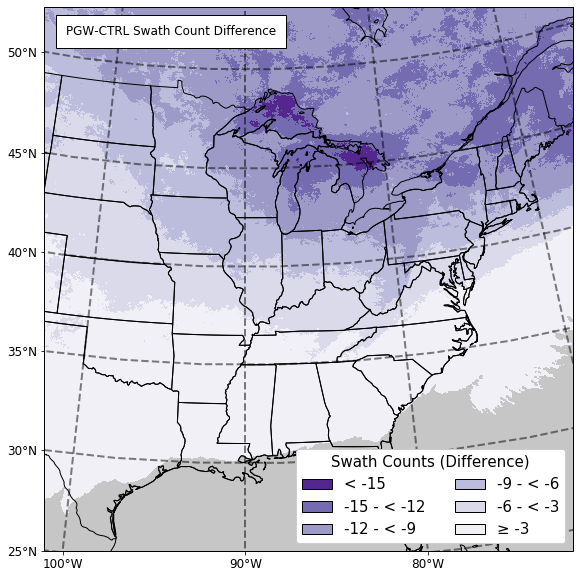

In [9]:
fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1,1),
                axes_pad=1,
                label_mode='')

for i, ax in enumerate(axgr):
    ax.set_extent([-101, -72, 25, 52], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    draw_states(ax)
    fig.canvas.draw()
        
    xticks = list(range(-170, -20, 10))
    yticks = list(range(10, 80, 5))
    ax.gridlines(xlocs=xticks, ylocs=yticks, linewidth=2, color='k', alpha=0.5, linestyle='--')

    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    lambert_xticks(ax, xticks)
    lambert_yticks(ax, yticks)
        
    val = (tracks_p/12)-(tracks_c/12)

    mask = np.ma.masked_where(tracks_c.copy() != 0, 1*(tracks_c.copy()==0))

    classes = [-20, -15, -12, -9, -6, -3, 5]

    legend_colors = ['#f2f0f7','#dadaeb','#bcbddc','#9e9ac8','#756bb1','#54278f'][::-1]
    legend_boundaries = ["< -15", "-15 - < -12", "-12 - < -9", "-9 - < -6", "-6 - < -3", "≥ -3"]
    legend_title = "Swath Counts (Difference)"

    description = "PGW-CTRL Swath Count Difference"
    
    cmap = ListedColormap(legend_colors)
    norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)
        
    ax = generate_spc_legend(ax, legend_title, legend_boundaries, legend_colors, size=15, fontsize=15)
    
    ax.pcolormesh(snow.XLONG.values, snow.XLAT.values, val,
                  cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
    
    ax.pcolormesh(snow.XLONG.values, snow.XLAT.values, mask, vmin=0, vmax=3, 
                  cmap='Greys', transform=ccrs.PlateCarree())

    txt = ax.text(-104.2, 51, description, transform=ccrs.PlateCarree(), fontsize=12, 
                  bbox=dict(facecolor='w', edgecolor='k', pad=10.0))

0.0

C:\Users\ahaberlie1\AppData\Local\Continuum\anaconda3\envs\r37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


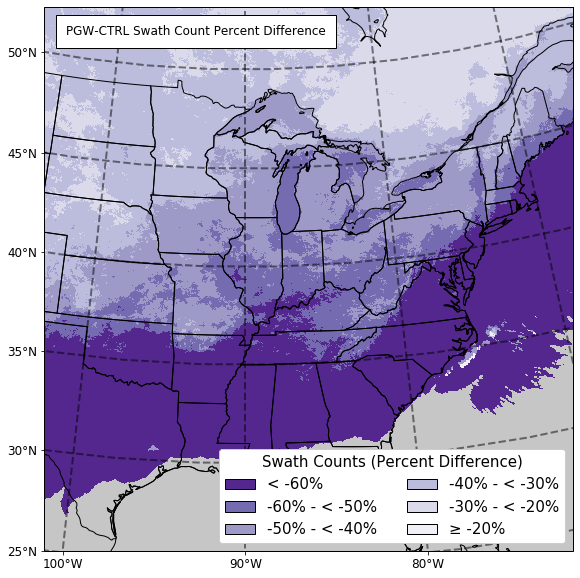

In [12]:
fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1,1),
                axes_pad=1,
                label_mode='')

for i, ax in enumerate(axgr):
    ax.set_extent([-101, -72, 25, 52], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    draw_states(ax)
    fig.canvas.draw()
        
    xticks = list(range(-170, -20, 10))
    yticks = list(range(10, 80, 5))
    ax.gridlines(xlocs=xticks, ylocs=yticks, linewidth=2, color='k', alpha=0.5, linestyle='--')

    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    lambert_xticks(ax, xticks)
    lambert_yticks(ax, yticks)
        
    val = 100*((tracks_p/tracks_c)-1)

    mask = np.ma.masked_where(tracks_c.copy() != 0, 1*(tracks_c.copy()==0))

    classes = [-100, -60, -50, -40, -30, -20, 100]

    legend_colors = ['#f2f0f7','#dadaeb','#bcbddc','#9e9ac8','#756bb1','#54278f'][::-1]
    legend_boundaries = ["< -60%", "-60% - < -50%", "-50% - < -40%", "-40% - < -30%",
                         "-30% - < -20%", "≥ -20%"]
    legend_title = "Swath Counts (Percent Difference)"

    description = "PGW-CTRL Swath Count Percent Difference"
    
    cmap = ListedColormap(legend_colors)
    norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)
        
    ax = generate_spc_legend(ax, legend_title, legend_boundaries, legend_colors, size=15, fontsize=15)
    
    ax.pcolormesh(snow.XLONG.values, snow.XLAT.values, val,
                  cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
    
    ax.pcolormesh(snow.XLONG.values, snow.XLAT.values, mask, vmin=0, vmax=3, 
                  cmap='Greys', transform=ccrs.PlateCarree())

    txt = ax.text(-104.2, 51, description, transform=ccrs.PlateCarree(), fontsize=12, 
                  bbox=dict(facecolor='w', edgecolor='k', pad=10.0))